HW 1.
1. 跑過 MLP, KNN, mean-shift, K-means 使用 Scikit 或其他工具, 跑 4 種分類範例
2. 自行設計 loss function

Dataset: iris

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
import pandas as pd
import numpy as np

iris = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

category = len(np.unique(y_train))

1. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f %%" % (accuracy * 100))

Accuracy: 93.333 %


2. MLP

In [ ]:
# self activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))


def tanh(x):
    return (2/(1+np.exp(-2*x))) - 1


def relu(x):
    return x if x > 0 else 0


In [ ]:
# one-hot encode
y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=category)
y_test2 = tf.keras.utils.to_categorical(y_test, num_classes=category)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu, input_dim=x_train.shape[1]))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(category, activation=tf.nn.softmax))  # 多分類需要採用 softmax or maxout 的 activation function

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.categorical_crossentropy,  # 設計自己的 loss function
    metrics=['accuracy']
)

model.fit(x_train, y_train2, epochs=100, batch_size=12, verbose=1)
score = model.evaluate(x_test, y_test2, batch_size=12)

# Activation function: Softmax
prob = model.predict(x_test)
prob.astype(np.float)

# Cal cross-entropy
cross_entropy = tf.keras.metrics.categorical_crossentropy(y_test2, prob)
print("Cross Entropy: ", np.asarray(cross_entropy))

# pred = np.zeros(prob.shape, dtype=np.int)
# for i in range(prob.shape[0]):
#     index = np.argmax(prob[i])
#     for j in range(prob.shape[1]):
#         if j == index:
#             pred[i, j] = 1
#         else:
#             pred[i, j] = 0

column = ['setosa', 'virginica', 'versicolor']

# df_prob = pd.DataFrame(prob, columns=column, index=np.arange(1, 46))
# df_pred = pd.DataFrame(pred, columns=column, index=np.arange(1, 46))
# df_true = pd.DataFrame(y_test2, columns=column, index=np.arange(1, 46))
# print("probability: \n", df_prob)
# print("prediction: \n", df_pred)
# print("true labels: \n", df_true)

Epoch 1/100
9/9 [==============================] - 0s 3ms/step - loss: 1.1326 - accuracy: 0.3238
Epoch 2/100
9/9 [==============================] - 0s 2ms/step - loss: 1.0111 - accuracy: 0.5143
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.9224 - accuracy: 0.6857
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8620 - accuracy: 0.6952
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 0.8143 - accuracy: 0.6952
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.7757 - accuracy: 0.6952
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.7405 - accuracy: 0.6952
Epoch 8/100
9/9 [==============================] - 0s 4ms/step - loss: 0.7118 - accuracy: 0.6952
Epoch 9/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.6952
Epoch 10/100
9/9 [==============================] - 0s 3ms/step - loss: 0.6651 - accuracy: 0.6952
Epoch 11/100
9/9 [===========

Cross Entropy:  [0.01392194 0.07020666 0.03326705 0.00725246 0.04109804 0.05139979
 0.0229612  0.23748052 0.00899101 0.00574795 0.04494029 0.01791181
 0.00533907 0.02973245 0.01601227 0.04839183 0.09570677 0.03781384
 0.02928535 0.00636585 0.05287339 0.02110209 0.00702939 0.02124729
 0.00652092 0.01189296 0.31209806 0.01959934 0.04414895 0.00842408
 0.238572   0.02162028 1.0141222  0.09433573 0.03046514 0.11646673
 0.5000891  0.05335744 0.00493826 0.43364504 0.06828993 0.00528951
 0.04438103 0.27884474 0.01226688]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Dataset: blobs

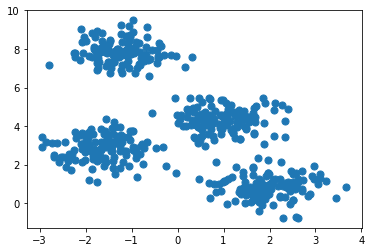

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

param_centers = 4
X, y_true = make_blobs(n_samples = 500, centers = param_centers, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:, 0], X[:, 1], s = 50)
plt.show()

1. K-means

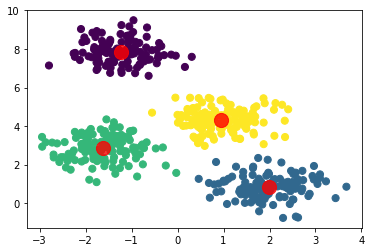

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = param_centers)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c = y_pred, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'red', s = 200, alpha = 0.8)
plt.show()

2. means-shift

number of estimated clusters : 4


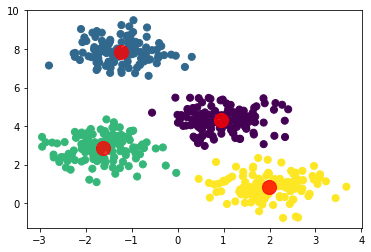

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=50)

mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(X)

labels = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_
print("number of estimated clusters : %d" % len(np.unique(labels)))

plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.8)
plt.show()